## Bike Rental Prediction

#### Importing Libraries and Dataset

In [1]:
# Loading Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import f_oneway
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Setting the Working Directory
os.chdir("D:\Data Science\Project\Bike Rental Prediction")
os.getcwd()

'D:\\Data Science\\Project\\Bike Rental Prediction'

In [3]:
df = pd.read_csv("day.csv",parse_dates=['dteday'],index_col=['instant'])
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
ts = df[['dteday','cnt']]
ts.head()

,dteday,cnt
instant,,
1,2011-01-01,985
2,2011-01-02,801
3,2011-01-03,1349
4,2011-01-04,1562
5,2011-01-05,1600


#### Exploratory Data Analysis

In [5]:
df.shape

(731, 15)

In [6]:
df.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

All the Variables are in proper Datatype

In [7]:
#counting missing value percentage
def missing_value(df):
    missing_val = pd.DataFrame(df.isnull().sum())
    missing_val = missing_val.reset_index()
    missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Count'})
    missing_val['Missing_percentage'] = (missing_val['Count']/len(df)*100)
    missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
    return missing_val

In [8]:
missing_value(df)

,Variables,Count,Missing_percentage
0,dteday,0,0.0
1,season,0,0.0
2,yr,0,0.0
3,mnth,0,0.0
4,holiday,0,0.0
5,weekday,0,0.0
6,workingday,0,0.0
7,weathersit,0,0.0
8,temp,0,0.0
9,atemp,0,0.0


There is no Missing Values present in the Dataset

In [9]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 91.4 KB


In [11]:
cat = ['mnth','season','yr','holiday','weekday','workingday','weathersit']
for i in cat:
    print('\n',i,'\n')
    print("Total Count:",df[i].count())
    print(df[i].value_counts())


 mnth 

Total Count: 731
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

 season 

Total Count: 731
3    188
2    184
1    181
4    178
Name: season, dtype: int64

 yr 

Total Count: 731
1    366
0    365
Name: yr, dtype: int64

 holiday 

Total Count: 731
0    710
1     21
Name: holiday, dtype: int64

 weekday 

Total Count: 731
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64

 workingday 

Total Count: 731
1    500
0    231
Name: workingday, dtype: int64

 weathersit 

Total Count: 731
1    463
2    247
3     21
Name: weathersit, dtype: int64


In [12]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Data Visualization

##### Univariate Analysis

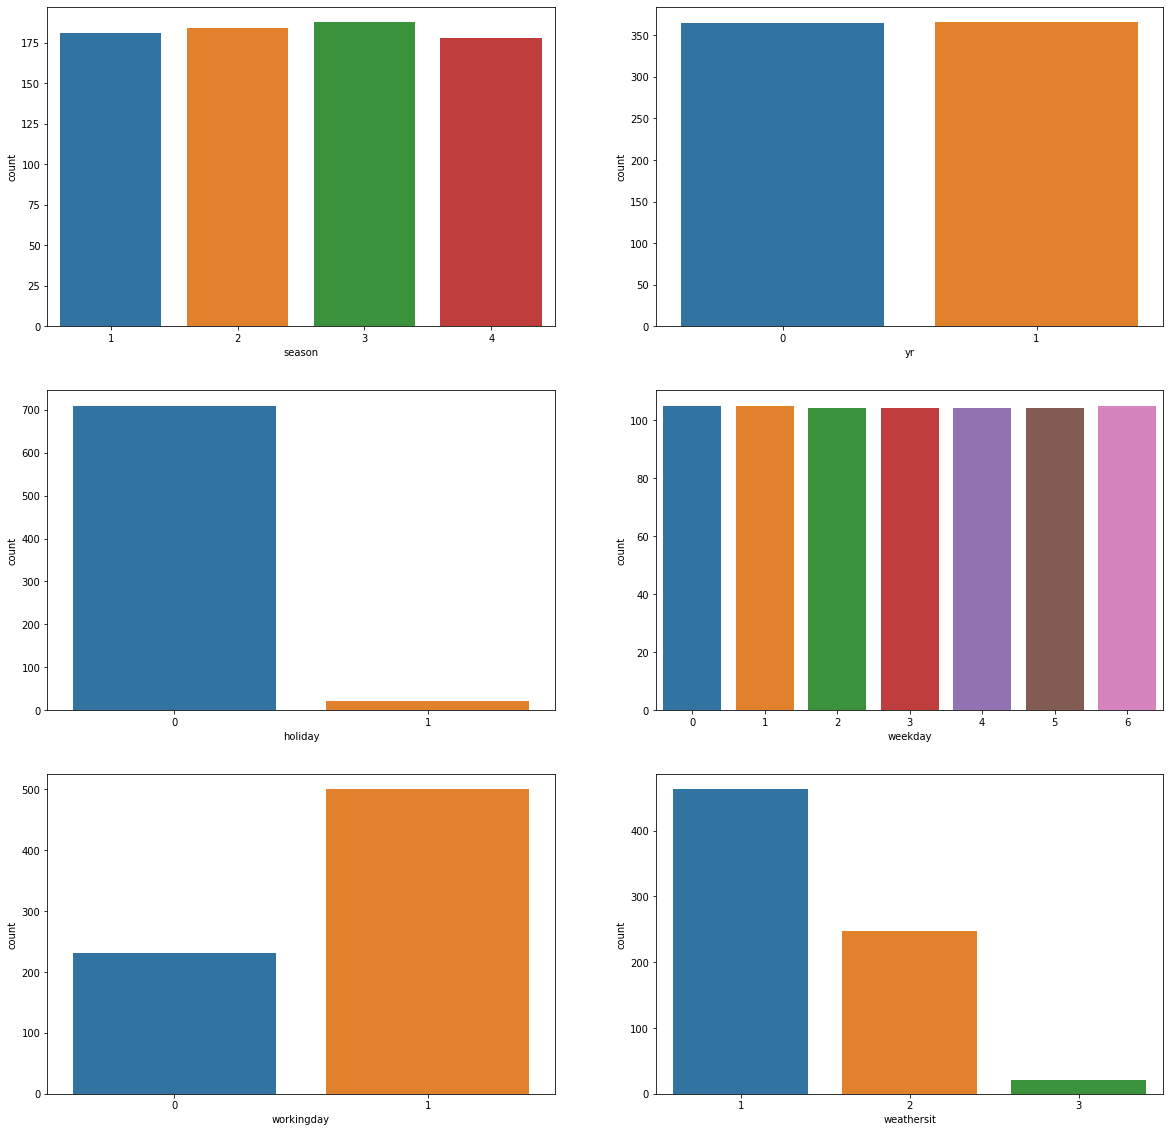

In [13]:
i=1
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.countplot(df[cat[i]])
i=i+1
plt.subplot(3,2,2)
sns.countplot(df[cat[i]])
i=i+1
plt.subplot(3,2,3)
sns.countplot(df[cat[i]])
i=i+1
plt.subplot(3,2,4)
sns.countplot(df[cat[i]])
i=i+1
plt.subplot(3,2,5)
sns.countplot(df[cat[i]])
i=i+1
plt.subplot(3,2,6)
sns.countplot(df[cat[i]])
plt.show()

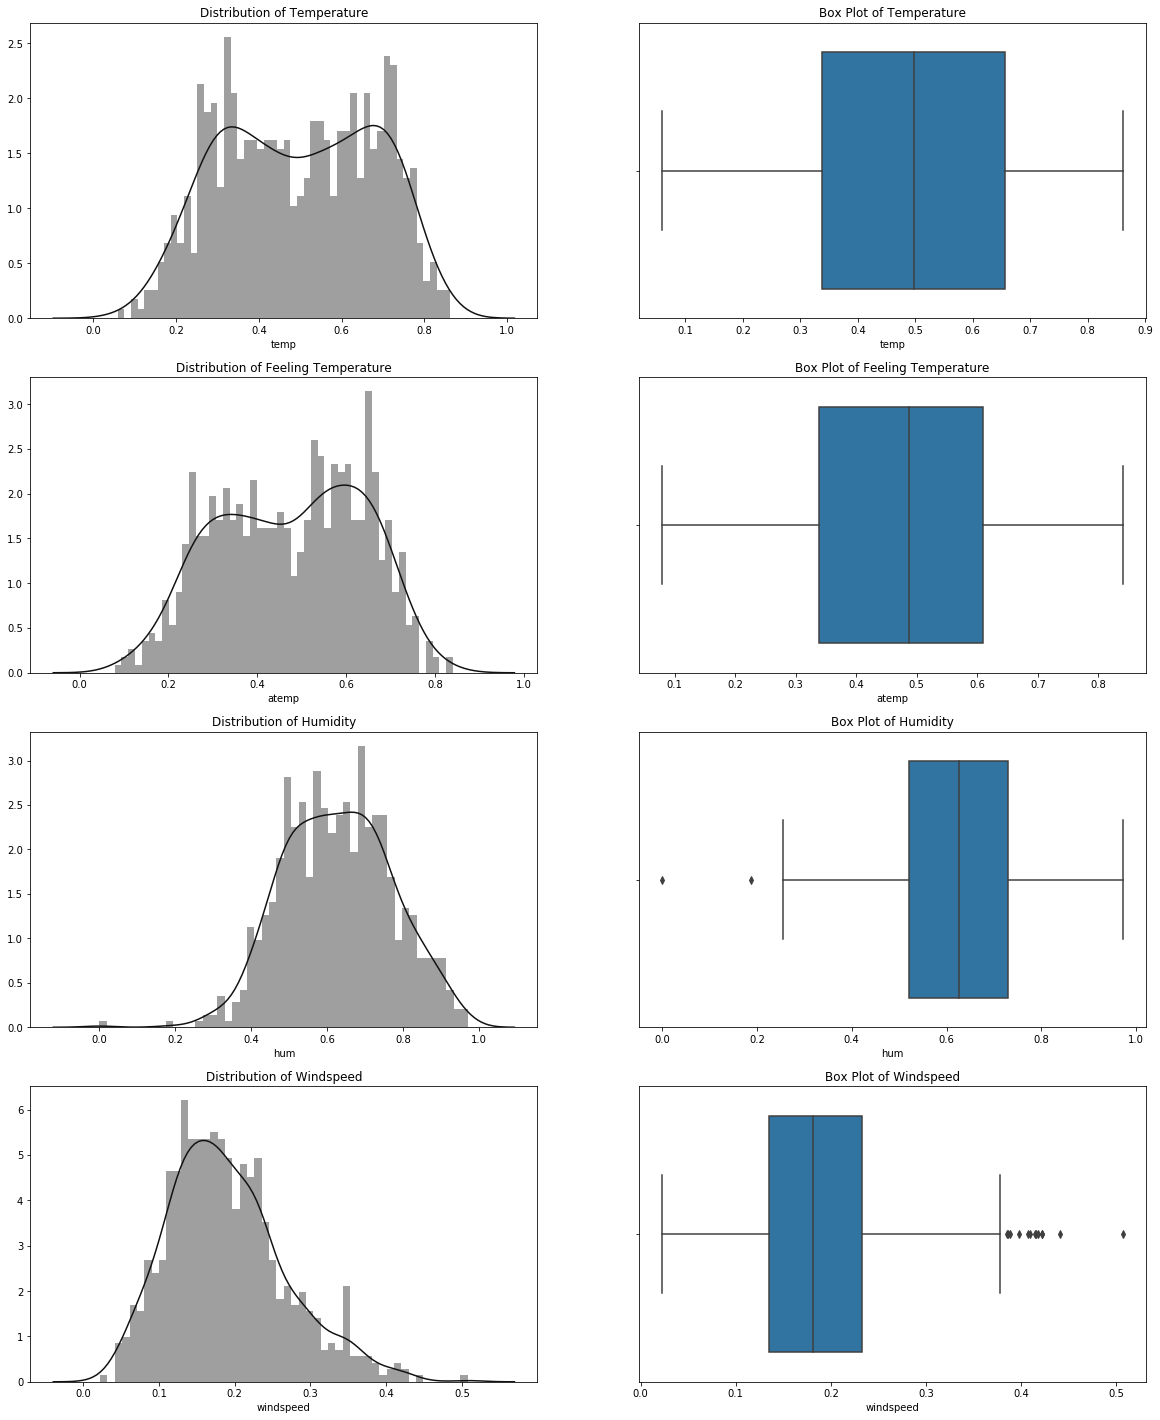

In [14]:
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
sns.distplot(df['temp'],bins=50,kde=True,color='#111111')
plt.title("Distribution of Temperature")
plt.subplot(4,2,2)
sns.boxplot(x=df['temp'])
plt.title("Box Plot of Temperature")

plt.subplot(4,2,3)
sns.distplot(df['atemp'],bins=50,kde=True,color='#111111')
plt.title("Distribution of Feeling Temperature")
plt.subplot(4,2,4)
sns.boxplot(x=df['atemp'])
plt.title("Box Plot of Feeling Temperature")

plt.subplot(4,2,5)
sns.distplot(df['hum'],bins=50,kde=True,color='#111111')
plt.title("Distribution of Humidity")
plt.subplot(4,2,6)
sns.boxplot(x=df['hum'])
plt.title("Box Plot of Humidity")

plt.subplot(4,2,7)
sns.distplot(df['windspeed'],bins=50,kde=True,color='#111111')
plt.title("Distribution of Windspeed")
plt.subplot(4,2,8)
sns.boxplot(x=df['windspeed'])
plt.title("Box Plot of Windspeed")

plt.show()

We observe a few outliers for Windspeed and Humidity, we will need to take care of that.

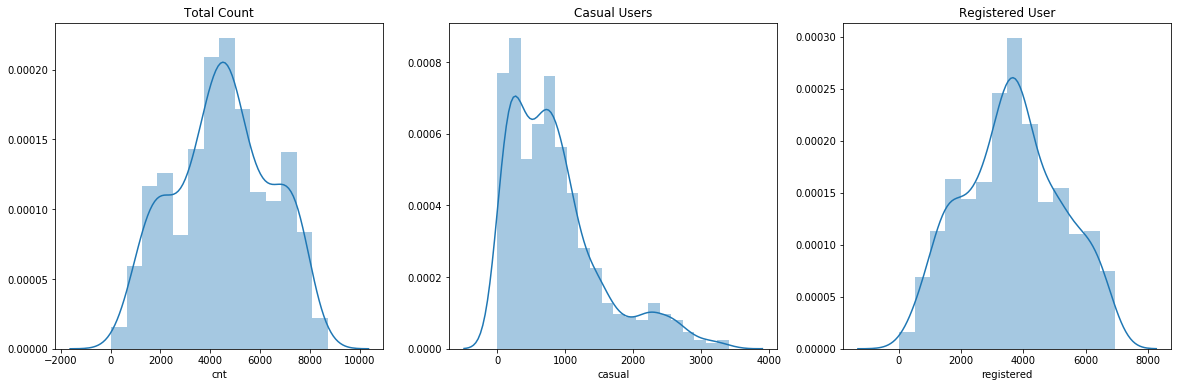

In [15]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.distplot(df['cnt'],bins='auto')
plt.title("Total Count")
plt.subplot(1,3,2)
sns.distplot(df['casual'],bins='auto')
plt.title("Casual Users")
plt.subplot(1,3,3)
sns.distplot(df['registered'],bins='auto')
plt.title("Registered User")

plt.show()

In [16]:
print("Skewness: %f" % df['cnt'].skew())
print("Kurtosis: %f" % df['cnt'].kurt())

Skewness: -0.047353
Kurtosis: -0.811922


##### Bivariate Analysis

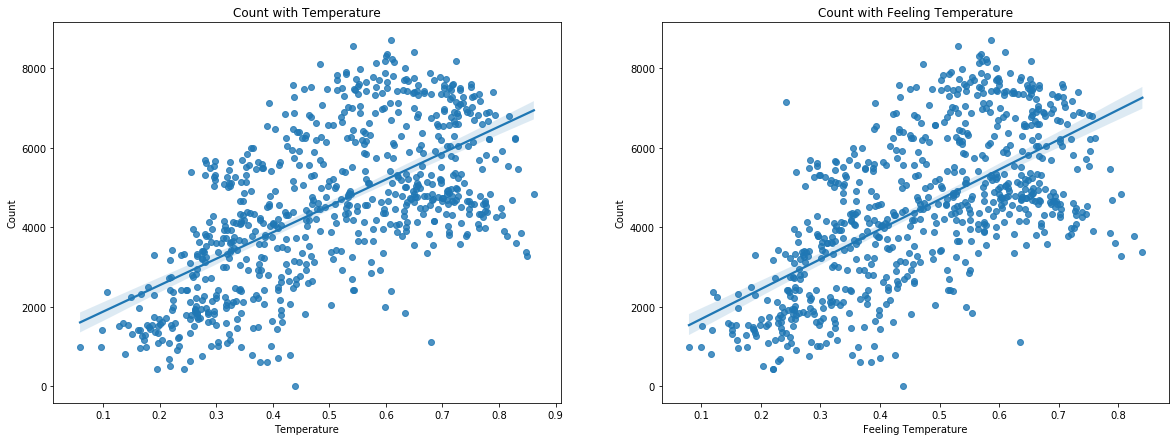

In [17]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.regplot(x='temp',y='cnt',data=df)
plt.title("Count with Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")
#plt.show()
plt.subplot(1,2,2)
sns.regplot(x='atemp',y='cnt',data=df)
plt.title("Count with Feeling Temperature")
plt.xlabel("Feeling Temperature")
plt.ylabel("Count")

plt.show()

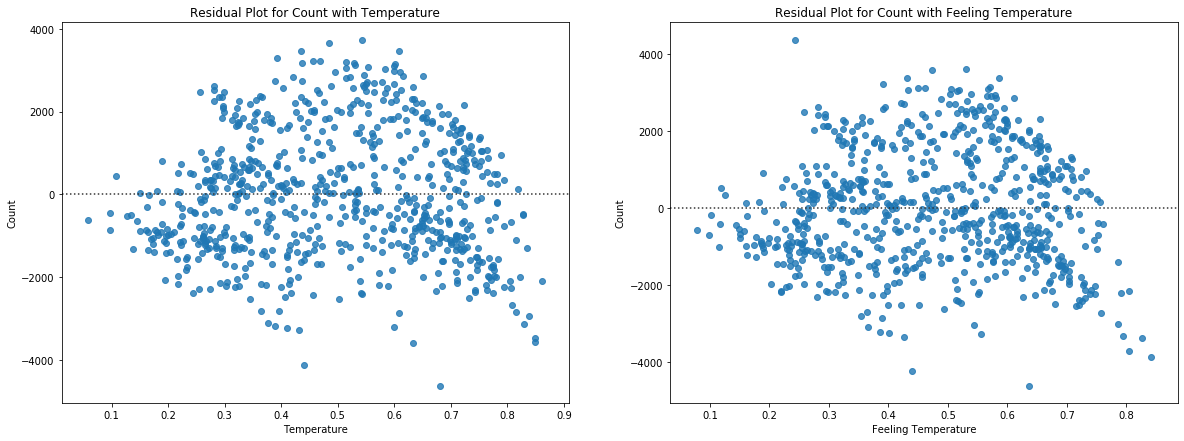

In [18]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.residplot(x='temp',y='cnt',data=df)
plt.title("Residual Plot for Count with Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")
#plt.show()
plt.subplot(1,2,2)
sns.residplot(x='atemp',y='cnt',data=df)
plt.title("Residual Plot for Count with Feeling Temperature")
plt.xlabel("Feeling Temperature")
plt.ylabel("Count")

plt.show()

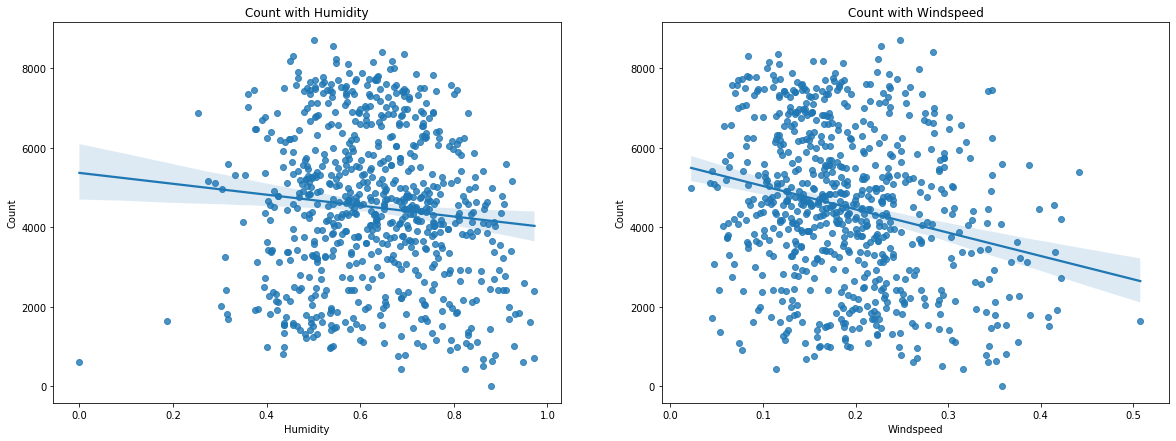

In [19]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.regplot(x='hum',y='cnt',data=df)
plt.title("Count with Humidity")
plt.xlabel("Humidity")
plt.ylabel("Count")
#plt.show()
plt.subplot(1,2,2)
sns.regplot(x='windspeed',y='cnt',data=df)
plt.title("Count with Windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Count")

plt.show()

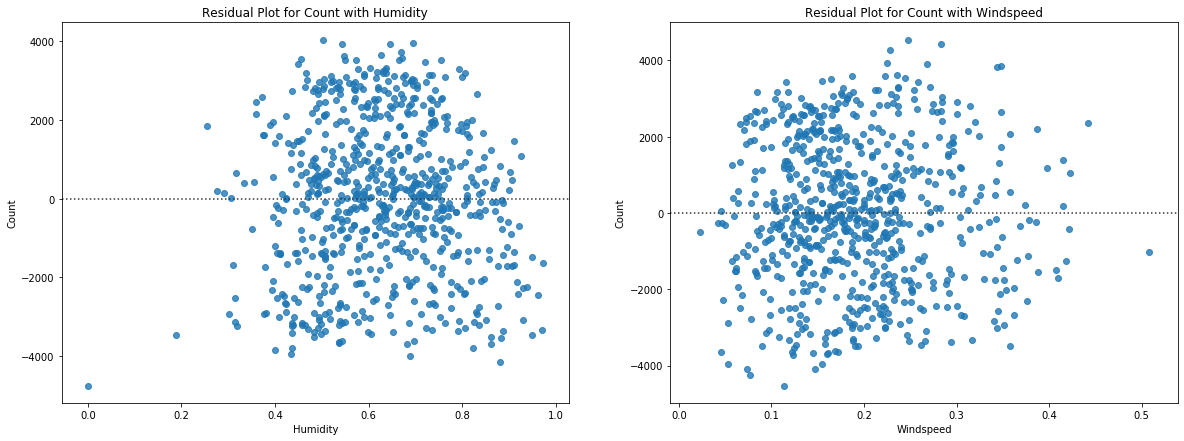

In [20]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.residplot(x='hum',y='cnt',data=df)
plt.title("Residual Plot for Count with Humidity")
plt.xlabel("Humidity")
plt.ylabel("Count")
#plt.show()
plt.subplot(1,2,2)
sns.residplot(x='windspeed',y='cnt',data=df)
plt.title("Residual Plot for Count with Windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Count")

plt.show()

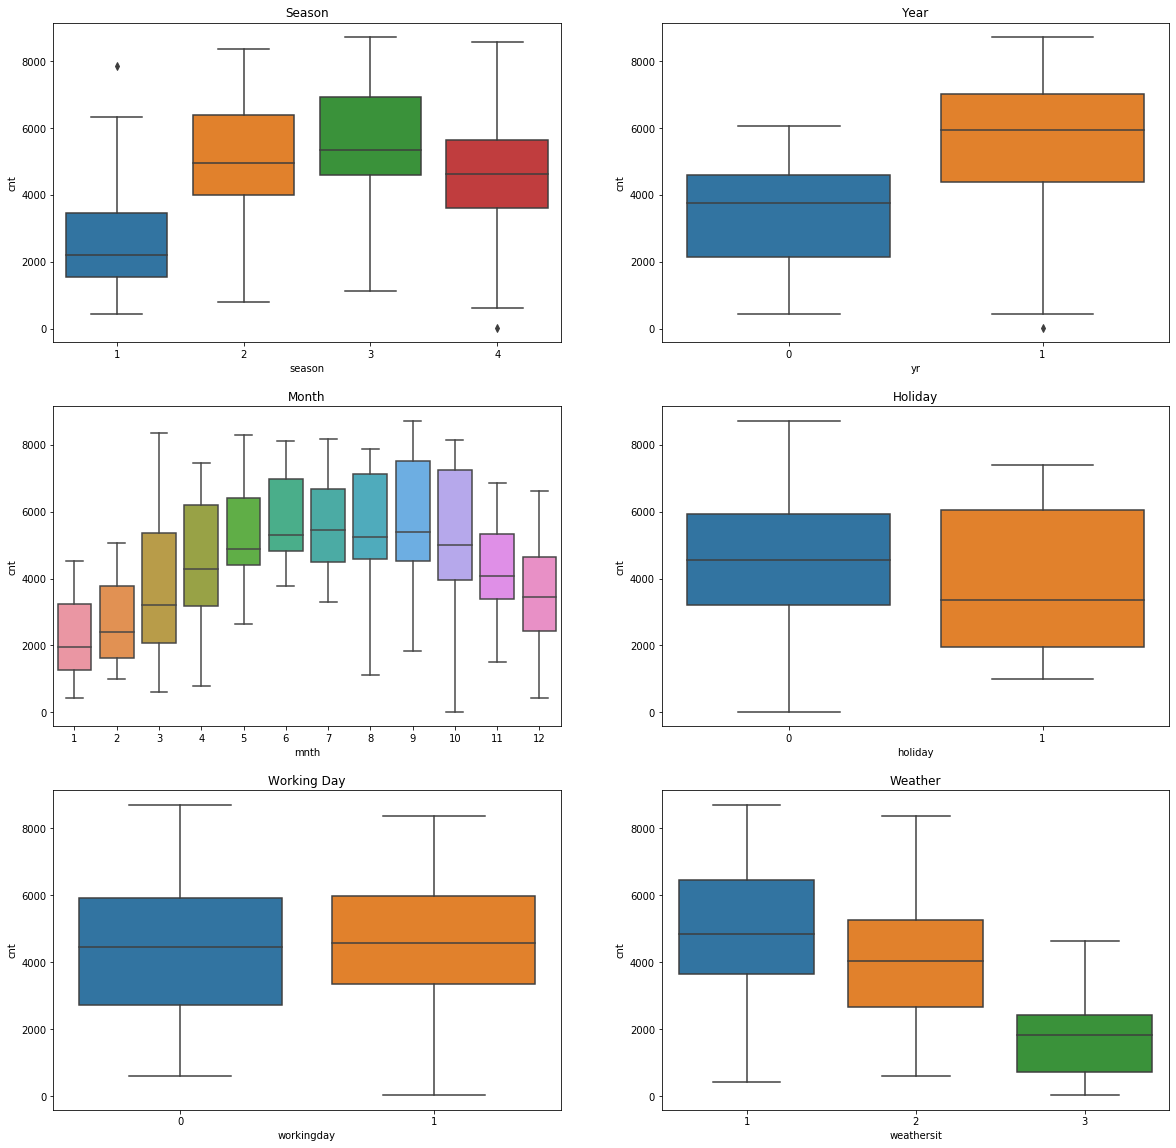

In [21]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.title('Season')
plt.subplot(3,2,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.title('Year')
plt.subplot(3,2,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.title('Month')
plt.subplot(3,2,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.title('Holiday')
plt.subplot(3,2,5)
sns.boxplot(x='workingday',y='cnt',data=df)
plt.title('Working Day')
plt.subplot(3,2,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.title('Weather')
plt.show()

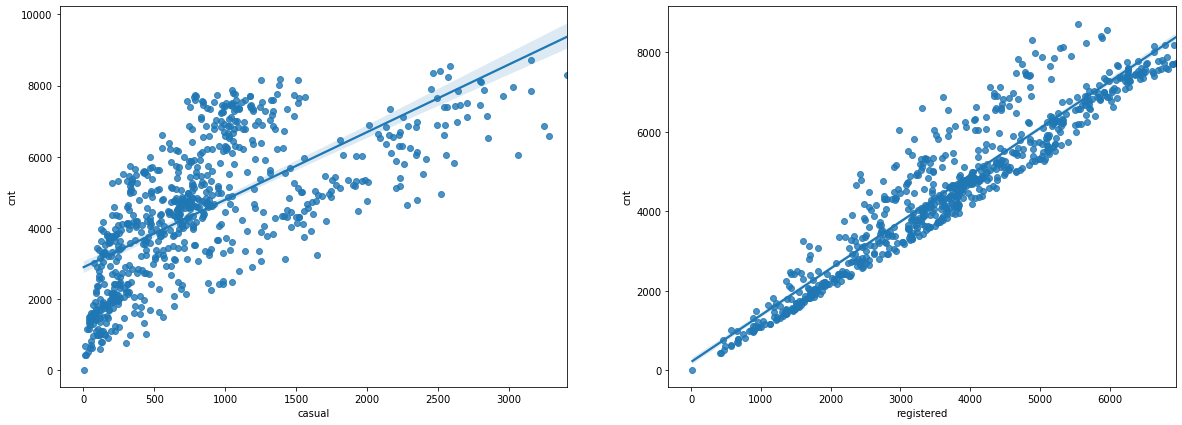

In [22]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.regplot(x='casual',y='cnt',data=df)
plt.subplot(1,2,2)
sns.regplot(x='registered',y='cnt',data=df)
plt.show()

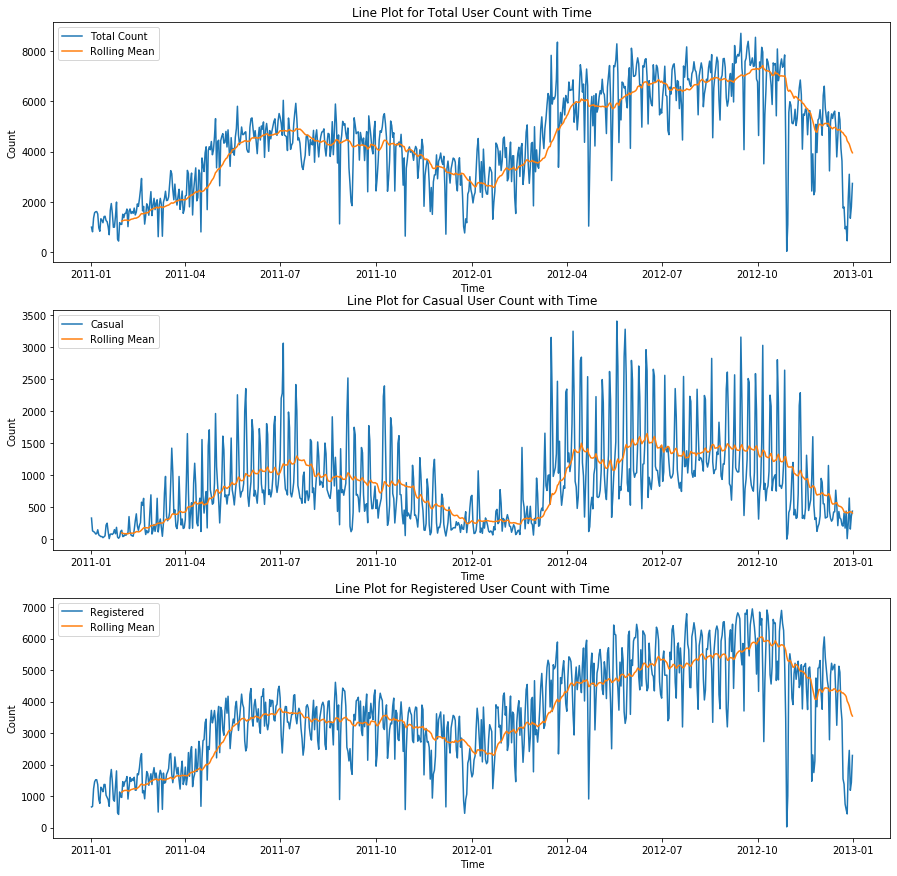

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(df['dteday'],df['cnt'],label='Total Count')
rol_cnt = df['cnt'].rolling(window=30).mean()
plt.plot(df['dteday'],rol_cnt,label='Rolling Mean')
plt.title("Line Plot for Total User Count with Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend(loc=2)

plt.subplot(3,1,2)
sns.lineplot(df['dteday'],df['casual'],label='Casual')
rol_cas = df['casual'].rolling(window=30).mean()
plt.plot(df['dteday'],rol_cas,label='Rolling Mean')
plt.title("Line Plot for Casual User Count with Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend(loc=2)

plt.subplot(3,1,3)
plt.plot(df['dteday'],df['registered'],label='Registered')
rol_reg = df['registered'].rolling(window=30).mean()
plt.plot(df['dteday'],rol_reg,label='Rolling Mean')
plt.title("Line Plot for Registered User Count with Time")
plt.xlabel("Time")
plt.ylabel("Count")
plt.legend(loc=2)

plt.show()

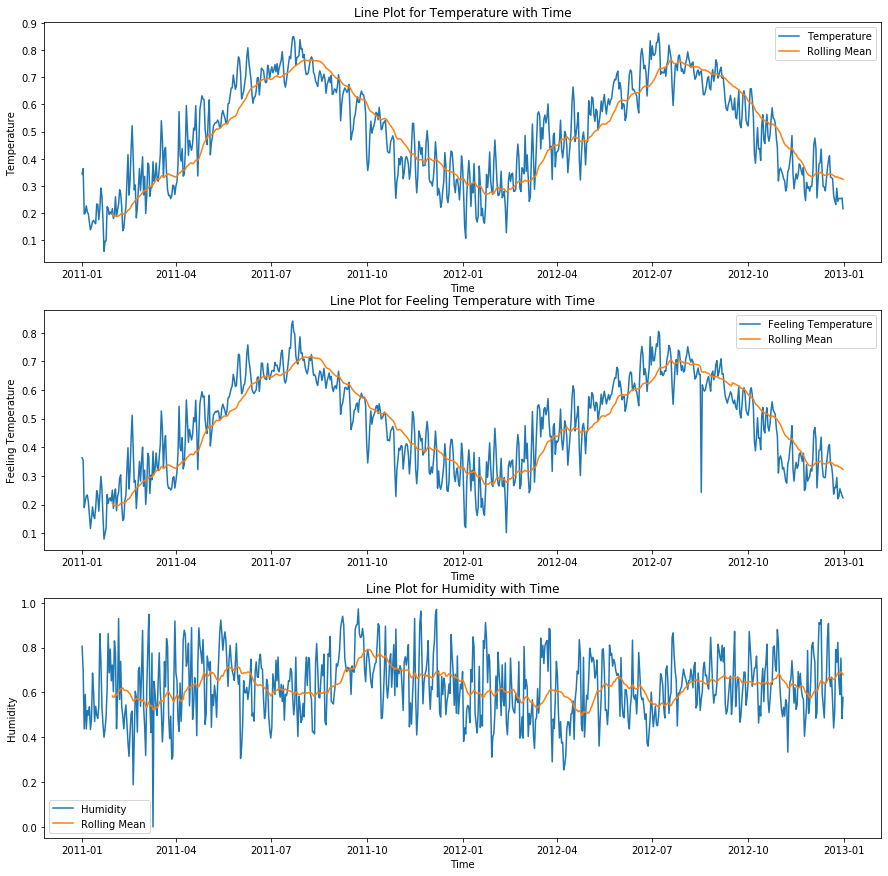

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
plt.plot(df['dteday'],df['temp'],label='Temperature')
rol_tmp = df['temp'].rolling(window=30).mean()
plt.plot(df['dteday'],rol_tmp,label='Rolling Mean')
plt.title("Line Plot for Temperature with Time")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend(loc=0)

plt.subplot(3,1,2)
sns.lineplot(df['dteday'],df['atemp'],label='Feeling Temperature')
rol_atmp = df['atemp'].rolling(window=30).mean()
plt.plot(df['dteday'],rol_atmp,label='Rolling Mean')
plt.title("Line Plot for Feeling Temperature with Time")
plt.xlabel("Time")
plt.ylabel("Feeling Temperature")
plt.legend(loc=0)

plt.subplot(3,1,3)
plt.plot(df['dteday'],df['hum'],label='Humidity')
rol_hum = df['hum'].rolling(window=30).mean()
plt.plot(df['dteday'],rol_hum,label='Rolling Mean')
plt.title("Line Plot for Humidity with Time")
plt.xlabel("Time")
plt.ylabel("Humidity")
plt.legend(loc=0)

plt.show()

Seasonality exists in the dataset.

##### Correlation Analysis

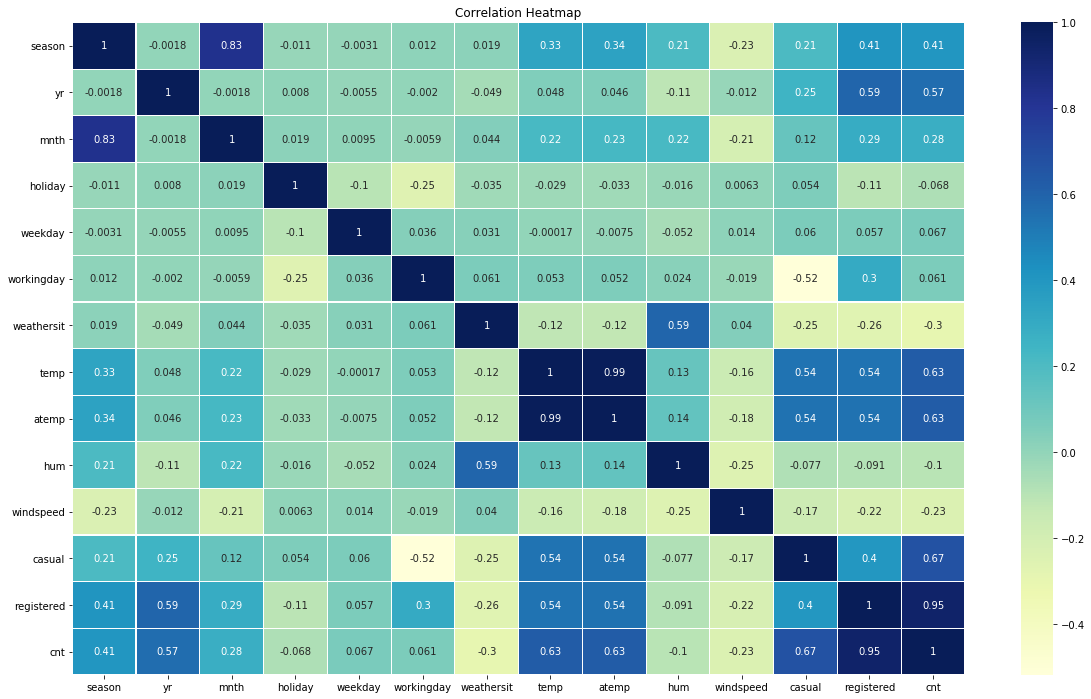

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(data=df.corr(),yticklabels=True,linewidths=.1,cmap='YlGnBu',annot=True)
plt.title("Correlation Heatmap")
plt.show()

#### Feature Selection

In [26]:
df.drop('dteday',axis=1,inplace=True)

##### Multicollinearity Check

In [27]:
def multi_check(df,i):
    
    y=df[i];
    x=df.drop(i,axis=1)
    x=x.drop(['cnt'],axis=1)
    ml = LinearRegression()
    y_ml = ml.fit(x,y)
    rsq = ml.score(x,y)
    vif = round(1/(1-rsq),4)
    return vif,rsq

In [28]:
numeric=list(df.select_dtypes(include=[np.number]).columns.values)
numeric.remove('cnt')
for i in numeric:
    vif,rsq = multi_check(df,i)
    print("R Square value of {} is {} and VIF is {}".format(i,(round(rsq, 4)),vif))

R Square value of season is 0.7564 and VIF is 4.1043
R Square value of yr is 0.6354 and VIF is 2.7429
R Square value of mnth is 0.7024 and VIF is 3.3603
R Square value of holiday is 0.0893 and VIF is 1.0981
R Square value of weekday is 0.0488 and VIF is 1.0513
R Square value of workingday is 0.6786 and VIF is 3.1113
R Square value of weathersit is 0.4778 and VIF is 1.9149
R Square value of temp is 0.9843 and VIF is 63.6502
R Square value of atemp is 0.9846 and VIF is 64.806
R Square value of hum is 0.4867 and VIF is 1.9484
R Square value of windspeed is 0.2015 and VIF is 1.2524
R Square value of casual is 0.7169 and VIF is 3.5327
R Square value of registered is 0.8332 and VIF is 5.9934


In [29]:
for i in numeric:
    pearson_coef, p_value = pearsonr(df[i], df['cnt'])
    print("\nThe Pearson Correlation Coefficient of ",i," is ", round(pearson_coef,3), " with a P-value of P = ", round(p_value,5))


The Pearson Correlation Coefficient of  season  is  0.406  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  yr  is  0.567  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  mnth  is  0.28  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  holiday  is  -0.068  with a P-value of P =  0.06476

The Pearson Correlation Coefficient of  weekday  is  0.067  with a P-value of P =  0.06839

The Pearson Correlation Coefficient of  workingday  is  0.061  with a P-value of P =  0.09849

The Pearson Correlation Coefficient of  weathersit  is  -0.297  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  temp  is  0.627  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  atemp  is  0.631  with a P-value of P =  0.0

The Pearson Correlation Coefficient of  hum  is  -0.101  with a P-value of P =  0.00645

The Pearson Correlation Coefficient of  windspeed  is  -0.235  with a P-value of P =  0.0

The Pearson Correlatio

##### Anova Test

In [30]:
#Anova Test
an = df['cnt'].groupby(df['season'])
f,p = f_oneway(an.get_group(1),an.get_group(2),an.get_group(3),an.get_group(4))
print("season \t:",f,"\t",p)

season 	: 128.76962156570784 	 6.720391362913176e-67


In [31]:
l=['yr','holiday','workingday']
for i in l:
    an = df['cnt'].groupby(df[i])
    f,p = f_oneway(an.get_group(0),an.get_group(1))
    print(i,"\t:",f,"\t",p)

yr 	: 344.8905855356836 	 2.4835399044509515e-63
holiday 	: 3.4214410399722115 	 0.064759357926115
workingday 	: 2.736742283191394 	 0.0984949616002635


In [32]:
an = df['cnt'].groupby(df['weekday'])
f,p = f_oneway(an.get_group(1),an.get_group(2),an.get_group(3),an.get_group(4),an.get_group(5),an.get_group(6),an.get_group(0))
print("weekday \t:",f,"\t",p)

weekday 	: 0.7828624296214937 	 0.583494082505154


In [33]:
an = df['cnt'].groupby(df['weathersit'])
f,p = f_oneway(an.get_group(1),an.get_group(2),an.get_group(3))
print("weathersit \t:",f,"\t",p)

weathersit 	: 40.06604492024684 	 3.106317270053755e-17


In [34]:
df.drop(['weekday','workingday','holiday','mnth','temp','hum','windspeed','registered'],axis=1,inplace=True)
df.head()

,season,yr,weathersit,atemp,casual,cnt
instant,,,,,,
1,1,0,2,0.363625,331,985
2,1,0,2,0.353739,131,801
3,1,0,1,0.189405,120,1349
4,1,0,1,0.212122,108,1562
5,1,0,1,0.229270,82,1600


In [35]:
numeric=list(df.select_dtypes(include=[np.number]).columns.values)
numeric.remove('cnt')
for i in numeric:
    vif,rsq = multi_check(df,i)
    print("R Square value of {} is {} and VIF is {}".format(i,(round(rsq, 4)),vif))

R Square value of season is 0.1239 and VIF is 1.1414
R Square value of yr is 0.074 and VIF is 1.08
R Square value of weathersit is 0.0668 and VIF is 1.0716
R Square value of atemp is 0.3566 and VIF is 1.5542
R Square value of casual is 0.3774 and VIF is 1.6063


In [36]:
df.head()

,season,yr,weathersit,atemp,casual,cnt
instant,,,,,,
1,1,0,2,0.363625,331,985
2,1,0,2,0.353739,131,801
3,1,0,1,0.189405,120,1349
4,1,0,1,0.212122,108,1562
5,1,0,1,0.229270,82,1600


#### Feature Engineering

In [37]:
dummy = pd.get_dummies(df['season'],drop_first=True)
dummy.rename(columns={2: "summer", 3: "fall", 4: "winter"},errors='raise',inplace=True)
df=pd.concat([df,dummy],axis=1)
df.head()

,season,yr,weathersit,atemp,casual,cnt,summer,fall,winter
instant,,,,,,,,,
1,1,0,2,0.363625,331,985,0,0,0
2,1,0,2,0.353739,131,801,0,0,0
3,1,0,1,0.189405,120,1349,0,0,0
4,1,0,1,0.212122,108,1562,0,0,0
5,1,0,1,0.229270,82,1600,0,0,0


In [38]:
dummy = pd.get_dummies(df['weathersit'])
dummy.drop(3,axis=1,inplace = True)
dummy.rename(columns={2: "mist", 1: "clear"},errors='raise',inplace=True)
df=pd.concat([df,dummy],axis=1)
df.head()

,season,yr,weathersit,atemp,casual,cnt,summer,fall,winter,clear,mist
instant,,,,,,,,,,,
1,1,0,2,0.363625,331,985,0,0,0,0,1
2,1,0,2,0.353739,131,801,0,0,0,0,1
3,1,0,1,0.189405,120,1349,0,0,0,1,0
4,1,0,1,0.212122,108,1562,0,0,0,1,0
5,1,0,1,0.229270,82,1600,0,0,0,1,0


In [39]:
df.rename(columns={'yr':'2012'},inplace=True)
df.drop(['season','weathersit'],axis=1,inplace = True)
df.head()

,2012,atemp,casual,cnt,summer,fall,winter,clear,mist
instant,,,,,,,,,
1,0,0.363625,331,985,0,0,0,0,1
2,0,0.353739,131,801,0,0,0,0,1
3,0,0.189405,120,1349,0,0,0,1,0
4,0,0.212122,108,1562,0,0,0,1,0
5,0,0.229270,82,1600,0,0,0,1,0


#### Feature Scaling 

In [40]:
sc = MinMaxScaler()
df[['casual','cnt']] = sc.fit_transform(df[['casual','cnt']])
df.head()

,2012,atemp,casual,cnt,summer,fall,winter,clear,mist
instant,,,,,,,,,
1,0,0.363625,0.096538,0.110792,0,0,0,0,1
2,0,0.353739,0.037852,0.089623,0,0,0,0,1
3,0,0.189405,0.034624,0.152669,0,0,0,1,0
4,0,0.212122,0.031103,0.177174,0,0,0,1,0
5,0,0.229270,0.023474,0.181546,0,0,0,1,0


### Machine Learning Algorithm

In [41]:
X = df.drop('cnt',axis=1)
y = df['cnt']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)
print(X_test.shape, '\t', X_train.shape)

(220, 8) 	 (511, 8)


In [43]:
def model_plot(y):
    plt.figure(figsize=(10,7))
    ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
    sns.distplot(y, hist=False, color="b", label="Fitted Values" , ax=ax1)

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Count')
    plt.ylabel('Proportion of Bikes')

    plt.show()

#### Linear Regression

In [44]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)

In [45]:
rmse_lr=np.sqrt(mean_squared_error(y_lr,y_test))
print("Root Mean Square Error for Linear Regression =" ,rmse_lr)
print("r2 score for Linear Regression =" ,r2_score(y_test,y_lr))

Root Mean Square Error for Linear Regression = 0.09464071577381668
r2 score for Linear Regression = 0.8081039250634593


In [46]:
score = cross_val_score(lr,X_train,y_train,cv=5)
print("Minimum Score :",score.min())
print("Maximum Score :",score.max())
print("Mean Score :",score.mean())

Minimum Score : 0.7847869708904418
Maximum Score : 0.881100593000114
Mean Score : 0.8362650630705616


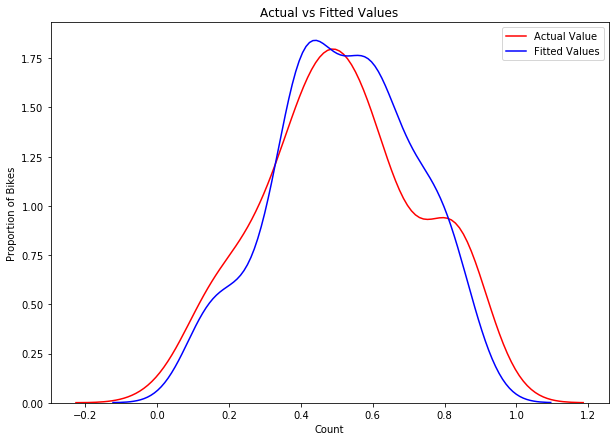

In [47]:
model_plot(y_lr)

*Using Linear Regression Model:*
- Root Mean Square Error = 0.094
- r2_score = 0.808
- cross_val_score = 0.836

#### Decision Tree

In [48]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_dt = dt.predict(X_test)

In [49]:
rmse_dt=np.sqrt(mean_squared_error(y_dt,y_test))
print("Root Mean Square Error for Decision Tree =" ,rmse_dt)
print("r2 score for Decision Tree =" ,r2_score(y_test,y_dt))

Root Mean Square Error for Decision Tree = 0.0919617810860169
r2 score for Decision Tree = 0.818813929124788


In [50]:
score = cross_val_score(dt,X_train,y_train,cv=5)
print("Minimum Score :",score.min())
print("Maximum Score :",score.max())
print("Mean Score :",score.mean())

Minimum Score : 0.7338501521307605
Maximum Score : 0.8346315019317604
Mean Score : 0.7800398679578668


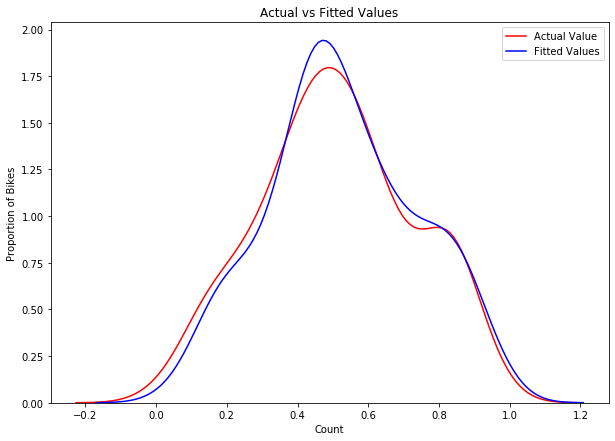

In [51]:
model_plot(y_dt)

*Using Decision Tree Model:*
- Root Mean Square Error = 0.094
- r2_score = 0.825
- cross_val_score = 0.78

#### Support Vector Machine

In [52]:
sv = SVR(C= 0.1, gamma= 0.1, kernel='linear')
sv.fit(X_train,y_train)
y_sv = sv.predict(X_test)

In [53]:
rmse_sv=np.sqrt(mean_squared_error(y_sv,y_test))
print("Root Mean Square Error for Support Vector Machine =" ,rmse_sv)
print("r2 score for Support Vector Machine =" ,r2_score(y_test,y_sv))

Root Mean Square Error for Support Vector Machine = 0.09779964137743927
r2 score for Support Vector Machine = 0.7950798883617997


In [54]:
score = cross_val_score(sv,X_train,y_train,cv=5)
print("Minimum Score :",score.min())
print("Maximum Score :",score.max())
print("Mean Score :",score.mean())

Minimum Score : 0.7896073950589085
Maximum Score : 0.8818522986230372
Mean Score : 0.8355376253359283


In [55]:
from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(sv,{'kernel':['linear','rbf','poly'],'gamma':[0.1,1,10],'C':[0.1,1,10,20]},cv=5)
#clf.fit(X,y)
#clf.best_params_

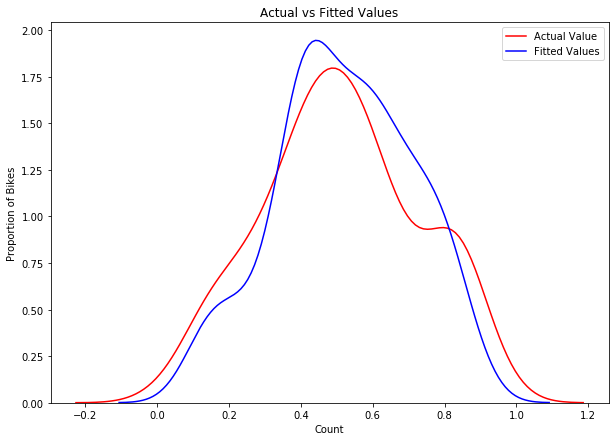

In [56]:
model_plot(y_sv)

*Using Support Vector Machine Model:*
- Root Mean Square Error = 0.085
- r2_score = 0.845
- cross_val_score = 0.835

#### K Nearest Neighbor

In [57]:
rmse_val = [] #to store rmse values for different k
for k in range(20):
    k = k+1
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_knn = knn.predict(X_test)
    rmse_knn=np.sqrt(mean_squared_error(y_knn,y_test))
    rmse_val.append(rmse_knn) #store rmse values
    print('RMSE value for k= ' , k , 'is:', rmse_knn)

RMSE value for k=  1 is: 0.09761562336543844
RMSE value for k=  2 is: 0.08844607673512922
RMSE value for k=  3 is: 0.08196086178389837
RMSE value for k=  4 is: 0.08145043969757747
RMSE value for k=  5 is: 0.08449519459478665
RMSE value for k=  6 is: 0.08934662723788421
RMSE value for k=  7 is: 0.09018411094493958
RMSE value for k=  8 is: 0.09119159737938716
RMSE value for k=  9 is: 0.09217685051506368
RMSE value for k=  10 is: 0.09316361214955662
RMSE value for k=  11 is: 0.09548589384976938
RMSE value for k=  12 is: 0.09723695868302804
RMSE value for k=  13 is: 0.09786817983665969
RMSE value for k=  14 is: 0.09920510882346568
RMSE value for k=  15 is: 0.10116980137036946
RMSE value for k=  16 is: 0.10260737036419314
RMSE value for k=  17 is: 0.10428863007327023
RMSE value for k=  18 is: 0.10579466402715026
RMSE value for k=  19 is: 0.10815202266940845
RMSE value for k=  20 is: 0.10995240437333577


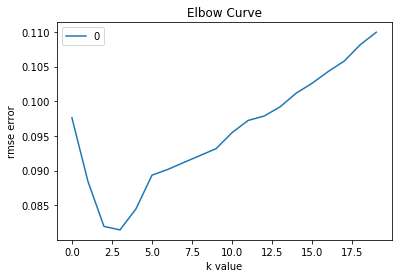

In [58]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
plt.title("Elbow Curve")
plt.xlabel("k value")
plt.ylabel("rmse error")
plt.show()

In [59]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
y_knn = knn.predict(X_test)

In [60]:
rmse_knn=np.sqrt(mean_squared_error(y_knn,y_test))
print("Root Mean Square Error for KNN =" ,rmse_knn)
print("r2 score for KNN =" ,r2_score(y_test,y_knn))

Root Mean Square Error for KNN = 0.08196086178389837
r2 score for KNN = 0.8560793566829394


In [61]:
score = cross_val_score(knn,X_train,y_train,cv=5)
print("Minimum Score :",score.min())
print("Maximum Score :",score.max())
print("Mean Score :",score.mean())

Minimum Score : 0.7761280397626775
Maximum Score : 0.8970503720867576
Mean Score : 0.8463611422305231


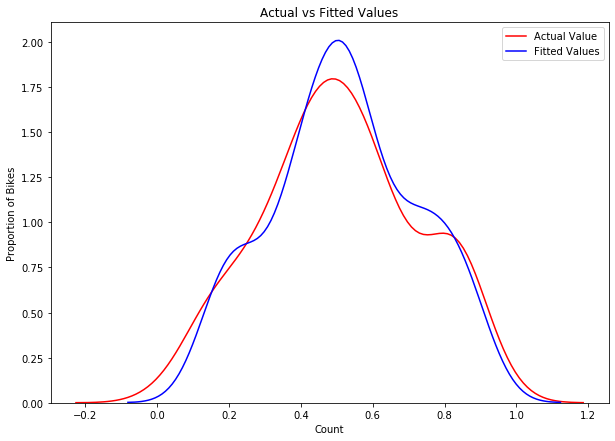

In [62]:
model_plot(y_knn)

*Using K Nearest Neighbor Model:*
- Root Mean Square Error = 0.082
- r2_score = 0.856
- cross_val_score = 0.846

#### Random Forrest

In [63]:
rf=RandomForestRegressor(max_depth= 10, max_features= 'sqrt', n_estimators = 200)
rf.fit(X_train,y_train)
y_rf=rf.predict(X_test)

In [64]:
rmse_rf=np.sqrt(mean_squared_error(y_rf,y_test))
print("Root Mean Square Error for Random Forrest =" ,rmse_rf)
print("r2 score for Random Forrest =" ,r2_score(y_test,y_rf))

Root Mean Square Error for Random Forrest = 0.07859436676420732
r2 score for Random Forrest = 0.8676594614540958


In [65]:
score = cross_val_score(rf,X_train,y_train,cv=5)
print("Minimum Score :",score.min())
print("Maximum Score :",score.max())
print("Mean Score :",score.mean())

Minimum Score : 0.8382218941308552
Maximum Score : 0.8956847246563011
Mean Score : 0.8762720559332594


In [66]:
#from sklearn.model_selection import GridSearchCV
#crf = GridSearchCV(rf,{'max_features':['auto','sqrt'],'n_estimators':[10,100,200],'max_depth' : [2,5,10,20]},cv=5)
#crf.fit(X,y)
#crf.best_params_

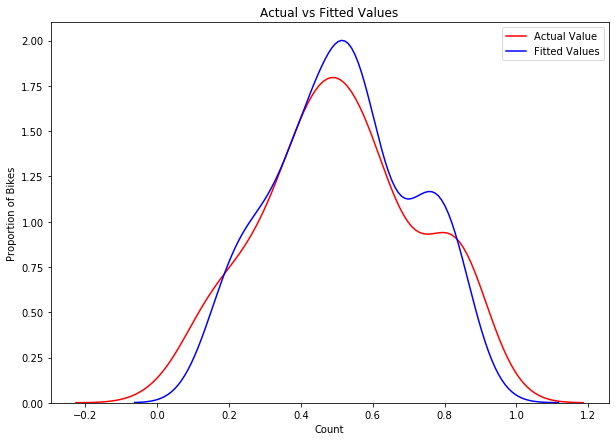

In [67]:
model_plot(y_rf)

*Using Random Forrest Model:*
- Root Mean Square Error = 0.076
- r2_score = 0.875
- cross_val_score = 0.876

#### Gradient Boosting

In [74]:
gb = GradientBoostingRegressor(learning_rate=0.1,max_depth= 5, max_features= 'sqrt', n_estimators= 50)
gb.fit(X_train,y_train)
y_gb = gb.predict(X_test)

In [75]:
rmse_gb=np.sqrt(mean_squared_error(y_gb,y_test))
print("Root Mean Square Error for Gradient Boost =" ,rmse_gb)
print("r2 score for Gradient Boost =" ,r2_score(y_test,y_gb))

Root Mean Square Error for Gradient Boost = 0.07625334419543099
r2 score for Gradient Boost = 0.8754258738815669


In [76]:
score = cross_val_score(gb,X_train,y_train,cv=5)
print("Minimum Score :",score.min())
print("Maximum Score :",score.max())
print("Mean Score :",score.mean())

Minimum Score : 0.8302966375302824
Maximum Score : 0.903806641626518
Mean Score : 0.8740922837573402


In [71]:
params = {'learning_rate':[0.1,0.5,1],
'n_estimators':[20,50,100],
'max_depth':[5,8],
'max_features':['sqrt','auto']}
cgb = GridSearchCV(gb,params,cv=5)
cgb.fit(X,y)
cgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 50}

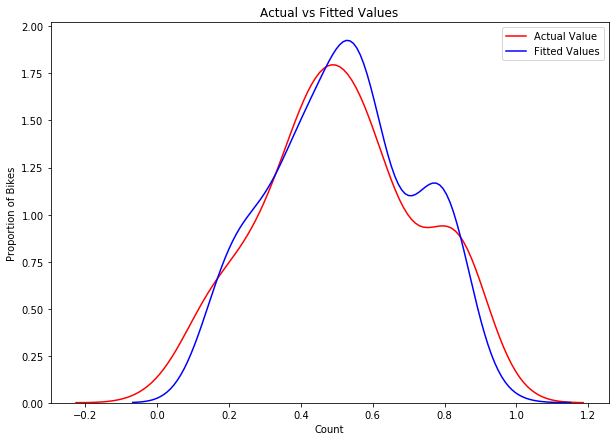

In [77]:
model_plot(y_gb)

*Gradient Boosting Model:*
- Root Mean Square Error = 0.072
- r2 score = 0.886
- cross_val_score = 0.874

So depending on the various 5 fold cross validation score, Random Forrest turns out to be performing the best after parameters tunins. So we select the Random Forrest Model for the project.